In [1]:
#installment packages

import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
import umap

from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn import cluster 
from sklearn.cluster import SpectralClustering

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Data Exploration : 

df = pd.read_csv("CC GENERAL.csv")

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.drop("CUST_ID", axis=1, inplace=True)

In [6]:
df.shape

(8950, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [8]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [14]:
df.isnull().sum().sort_values(ascending=False).head()

MINIMUM_PAYMENTS       313
CREDIT_LIMIT             1
TENURE                   0
PURCHASES_FREQUENCY      0
BALANCE_FREQUENCY        0
dtype: int64

In [15]:
df.MINIMUM_PAYMENTS  = df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.mean()) 

In [16]:
df.CREDIT_LIMIT      = df.CREDIT_LIMIT.fillna(df.CREDIT_LIMIT.mean()) 



In [17]:
df.isnull().sum().sort_values(ascending=False).head()

TENURE               0
ONEOFF_PURCH_FREQ    0
BALANCE_FREQUENCY    0
PURCHASES            0
ONEOFF_PURCHASES     0
dtype: int64

In [18]:
df.columns= ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCH_FREQ',
       'PURCH_INST_FREQ', 'CASH_ADVANCE_FREQ',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

In [21]:
# 2.Clustering Methods : 
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

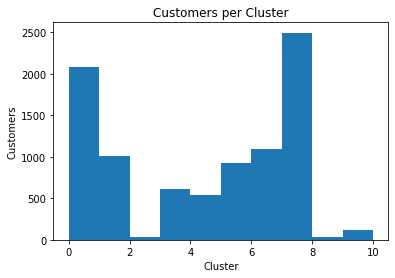

In [20]:

clustering = KMeans(n_clusters=n_clusters,
                    random_state=0
                   )

cluster_labels = clustering.fit_predict(df_std)

# plot cluster sizes

plt.hist(cluster_labels, bins=range(n_clusters+1))
plt.title ('Customers per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Customers')
plt.show()

In [24]:
# Kmeans : 
# Determining Number of Clusters with Elbow Method : 

wcss = []
cluster_list = range(1, 11)
for i in cluster_list :
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 40)
    kmeans.fit(df_std)
    wcss.append(kmeans.inertia_)

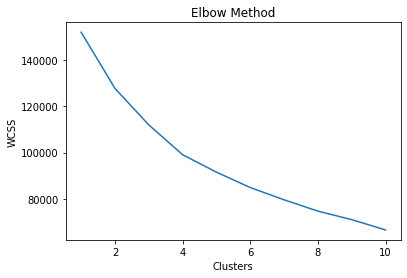

In [23]:
plt.plot(cluster_list, wcss)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

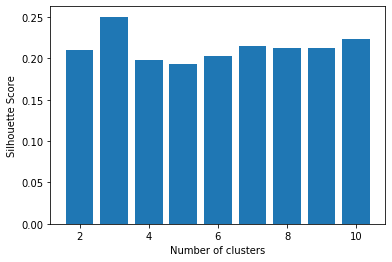

In [25]:
# Determining Number of Clusters with Silhouette Scores Method : 
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(df_std, KMeans(n_clusters = n_cluster).fit_predict(df_std))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()


In [27]:
# Kmeans Clusteringkmeans_values=[]
kmeans_values=[]

for cluster in range(2,20):
    kmeans = KMeans(n_clusters=cluster, random_state=40).fit_predict(df_std)
    sil_score = metrics.silhouette_score(df_std,kmeans, metric='euclidean')
    print("Silhouette score for {} cluster k-means: {:.3f}".format(cluster,
                                                               metrics.silhouette_score(df_std, kmeans, metric='euclidean')))
    kmeans_values.append((cluster,sil_score))

Silhouette score for 2 cluster k-means: 0.210
Silhouette score for 3 cluster k-means: 0.251
Silhouette score for 4 cluster k-means: 0.198
Silhouette score for 5 cluster k-means: 0.193
Silhouette score for 6 cluster k-means: 0.203
Silhouette score for 7 cluster k-means: 0.215
Silhouette score for 8 cluster k-means: 0.222
Silhouette score for 9 cluster k-means: 0.213
Silhouette score for 10 cluster k-means: 0.220
Silhouette score for 11 cluster k-means: 0.217
Silhouette score for 12 cluster k-means: 0.216
Silhouette score for 13 cluster k-means: 0.219
Silhouette score for 14 cluster k-means: 0.199
Silhouette score for 15 cluster k-means: 0.221
Silhouette score for 16 cluster k-means: 0.206
Silhouette score for 17 cluster k-means: 0.200
Silhouette score for 18 cluster k-means: 0.203
Silhouette score for 19 cluster k-means: 0.207


In [29]:
kmeans8 = df_std.copy() 

In [30]:
kmeans8_  = KMeans(n_clusters=8, random_state=40).fit(kmeans8) #without 'predict' we do not labels yet.

In [31]:
#If I would like to contiune with this model, I would add the clusters to the dataframe by following command.
#df['Kmeans_cluster']=kmeans8_.labels_

In [ ]:
# Hierarchical Clustering : 

siliuette_list_hierarchical = []

for cluster in range(2,20,2):
    for linkage_method in ['ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(df_std)
        sil_score = metrics.silhouette_score(df_std, agglomerative, metric='euclidean')
        siliuette_list_hierarchical.append((cluster, sil_score, linkage_method, len(set(agglomerative)) ) )
        
df_hierarchical = pd.DataFrame(siliuette_list_hierarchical, columns=['cluster', 'sil_score','linkage_method', 'number_of_clusters'])

In [ ]:
df_hierarchical.sort_values('sil_score', ascending=False) 

In [ ]:
df_hierarchical.sort_values('sil_score', ascending=False)

In [35]:
df_hierarchical.sort_values('sil_score', ascending=False)


,cluster,sil_score,linkage_method,number_of_clusters
1,2,0.840813,average,2
4,4,0.808091,average,4
2,2,0.786555,complete,2
5,4,0.779261,complete,4
7,6,0.756536,average,6
10,8,0.709597,average,8
13,10,0.669882,average,10
16,12,0.668982,average,12
19,14,0.660499,average,14
8,6,0.659815,complete,6


In [36]:
# Compering Results for the Optimal Number of Cluster Model : 

In [37]:
kmeans_      = KMeans(n_clusters=8, random_state=40).fit_predict(df_std) 

In [38]:
hierarchical_= AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=7).fit_predict(df_std) 

In [47]:
kmeansSilhouette_Score        = metrics.silhouette_score(df_std, kmeans_, metric='euclidean')


In [48]:
Hierarchical_Silhouette_Score = metrics.silhouette_score(df_std, hierarchical_, metric='euclidean')

In [49]:
Clustering_Silhouette_Scores  = [ ['KMeans',kmeansSilhouette_Score ], 
                                ['Hierarchical',Hierarchical_Silhouette_Score ]]

Clustering_Silhouette_Scores  = pd.DataFrame(Clustering_Silhouette_Scores, columns=['Clustering Method','Silhouette Score']) 
Clustering_Silhouette_Scores.sort_values(by='Silhouette Score', ascending= False)

,Clustering Method,Silhouette Score
1,Hierarchical,0.756460
0,KMeans,0.221935


In [50]:
# Although the Hierarchical method seems more suitable with a high silhouette score, after checking clusters and the number of variables in each cluster, this method seems that it is not a suitable one to understand this data set.